<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

C:\Users\M\AppData\Local\Temp\ipykernel_9376\2840023691.py:9: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\M\AppData\Local\Temp\ipykernel_9376\2840023691.py:9: RuntimeWarning: invalid value encountered in square
  z=z**2+c


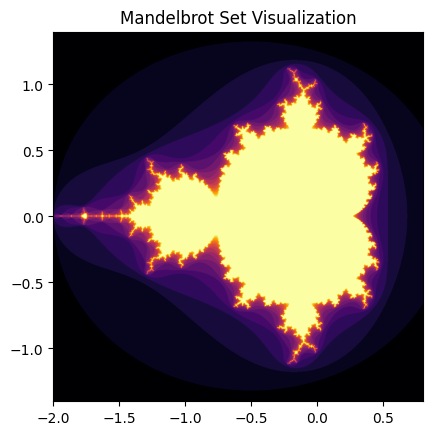

In [18]:
def mandelbrot(w, h):
    re=np.linspace(-2.0,0.8,w)
    im=np.linspace(-1.4,1.4,h)
    re,im=np.meshgrid(re,im)
    z=re+1j*im
    c=z.copy()
    diverge=np.full(z.shape,20)
    for n in range(20):
        z=z**2+c
        mask=(np.abs(z)>2)&(diverge==20)
        diverge[mask]=n+1
    plt.imshow(diverge,cmap='inferno',extent=[-2.0,0.8,-1.4,1.4])
    plt.title("Mandelbrot Set Visualization")
    plt.show()

mandelbrot(1000,1000)

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook

In [29]:
from IPython.display import SVG, display

C:\Users\M\AppData\Local\Temp\ipykernel_9376\1662483560.py:11: RuntimeWarning: overflow encountered in square
  z=z**2+c
C:\Users\M\AppData\Local\Temp\ipykernel_9376\1662483560.py:11: RuntimeWarning: invalid value encountered in square
  z=z**2+c


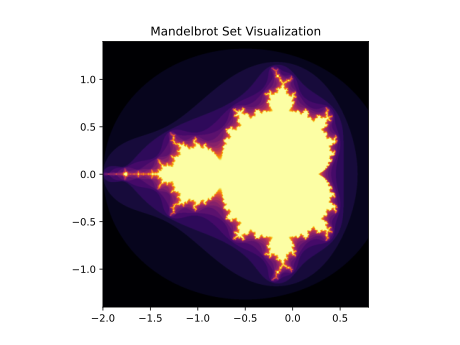

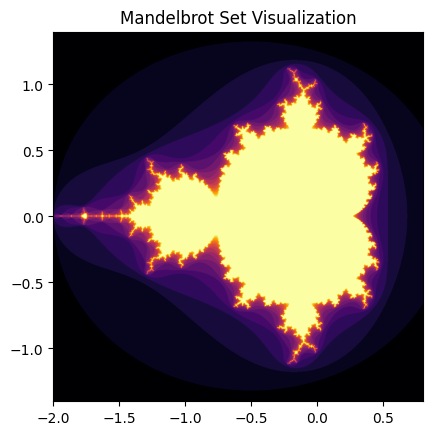

In [34]:
def mandelbrot2(domaine_x,domaine_y,w,h,max_iterations,filename='mandelbrot.svg'):
    re_min,re_max=domaine_x
    im_min,im_max=domaine_y
    re=np.linspace(re_min,re_max,w)
    im=np.linspace(im_min,im_max,h)
    re,im=np.meshgrid(re,im)
    z=re+1j*im
    c=z.copy()
    diverge=np.full(z.shape,max_iterations)
    for n in range(max_iterations):
        z=z**2+c
        mask=(np.abs(z)>2)&(diverge==20)
        diverge[mask]=n+1
    plt.imshow(diverge, cmap='inferno', extent=[re_min, re_max, im_min, im_max])
    plt.title("Mandelbrot Set Visualization")
    plt.savefig(filename,format='svg')
    display(SVG(filename))
    
mandelbrot2([-2,0.8],[-1.4,1.4],1000,1000,20,filename='mandelbrot.svg')